Uploading the CSV file on notebook

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving footballData.csv to footballData.csv


Importing necessary packages



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

Reading the file

In [ ]:
# read in the "footballData.csv" file and store it as a pandas DataFrame object named 'df'
df = pd.read_csv("footballData.csv")

Overview of the dataset

In [ ]:
# Print the first five rows of the dataframe
df.head()

,name,age,height_cm,weight_kg,nationality,club_name,overall_rating,value_euro,player_positions
0,L. Messi,33,170,72,Argentina,FC Barcelona,93,67500000,RW
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,92,46000000,ST
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,91,75000000,GK
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,91,80000000,ST
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,91,90000000,LW


Dataset rows & columns count

In [ ]:
# This code returns the shape of the dataframe
df.shape

(999, 9)

Description of the dataset

In [ ]:
# This code provides summary statistics for the numerical columns in the dataset
df.describe()

,age,height_cm,weight_kg,overall_rating,value_euro
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02
mean,27.368368,181.918919,76.824825,80.353353,1.773734e+07
std,3.962302,7.050664,7.564177,2.900188,1.303110e+07
min,18.000000,163.000000,58.000000,77.000000,0.000000e+00
25%,24.000000,177.000000,71.000000,78.000000,1.050000e+07
50%,27.000000,182.000000,77.000000,80.000000,1.400000e+07
75%,30.000000,187.000000,82.000000,82.000000,2.050000e+07
max,42.000000,200.000000,103.000000,93.000000,1.055000e+08


Correlation matrix of the dataset

<ipython-input-7-e627dd8d05c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


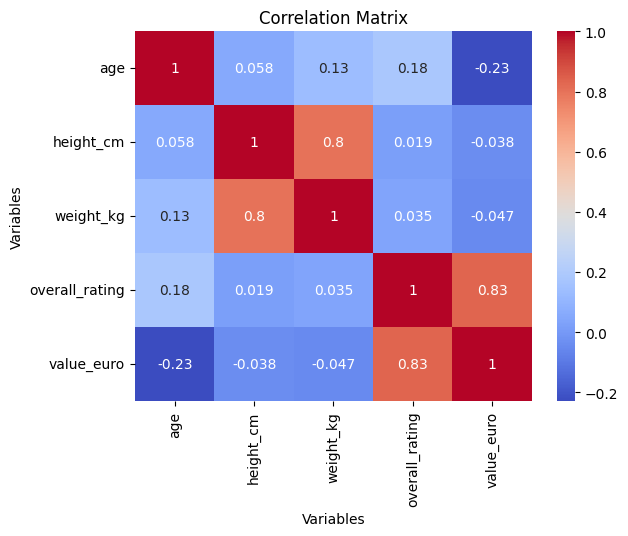

In [ ]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')

plt.show()

Plotting a scatter matrix

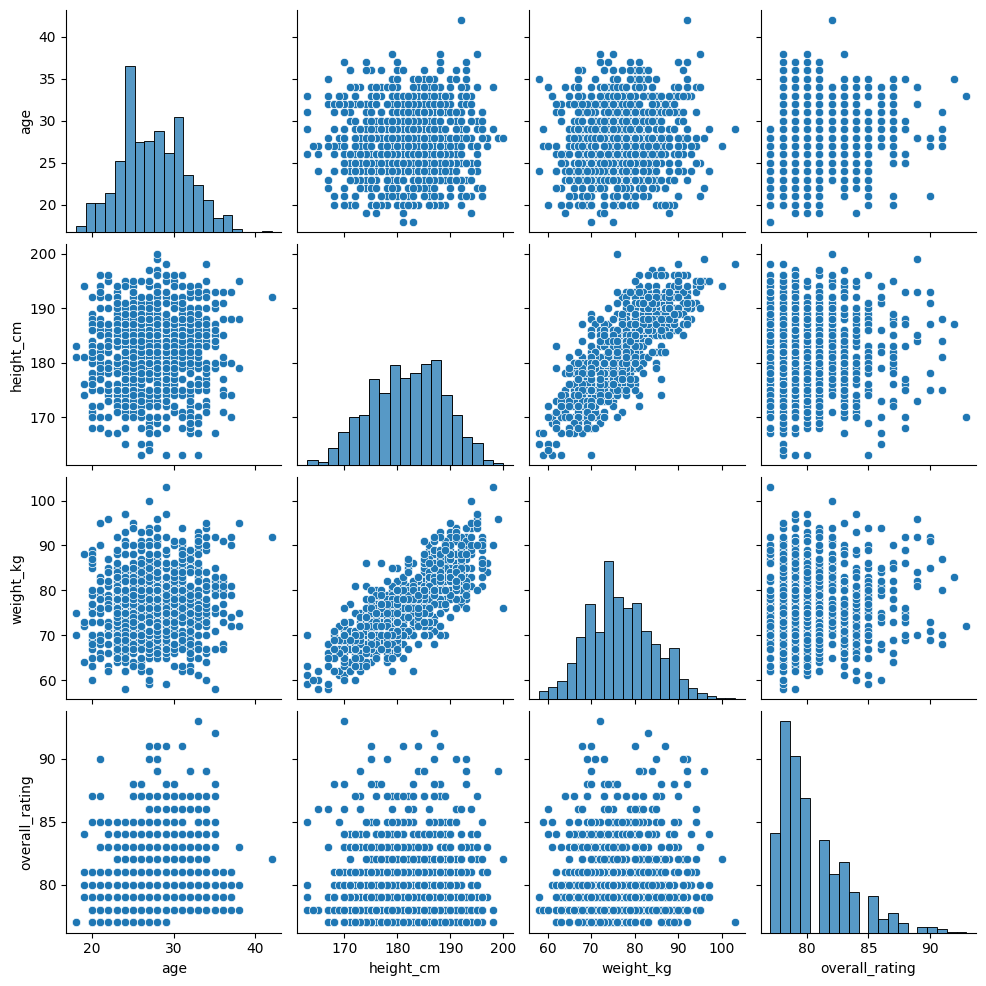

In [ ]:
target_col = "value_euro"
data_no_target = df.drop(target_col, axis=1)

sns.pairplot(data_no_target)

Bar chart of features

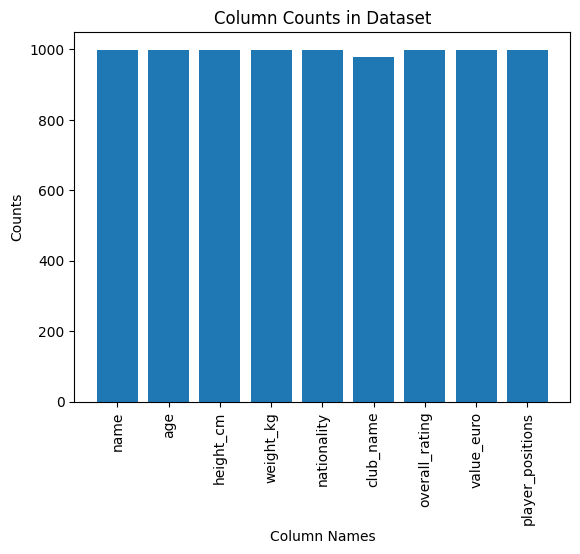

In [ ]:
col_counts = df.count()
col_names = col_counts.index.tolist()
col_values = col_counts.tolist()


plt.bar(col_names, col_values)

plt.title('Column Counts in Dataset')
plt.xlabel('Column Names')
plt.ylabel('Counts')

plt.xticks(rotation=90)

plt.show()

<Axes: >

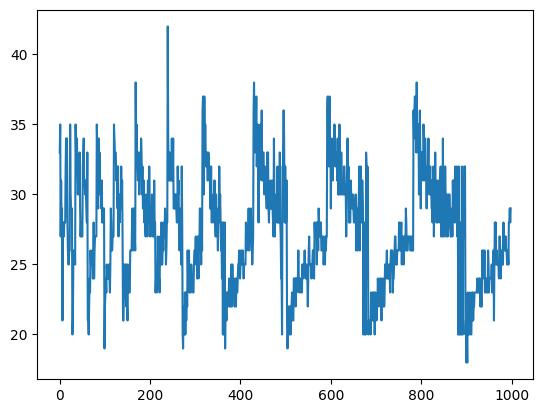

In [ ]:
df['age'].plot()

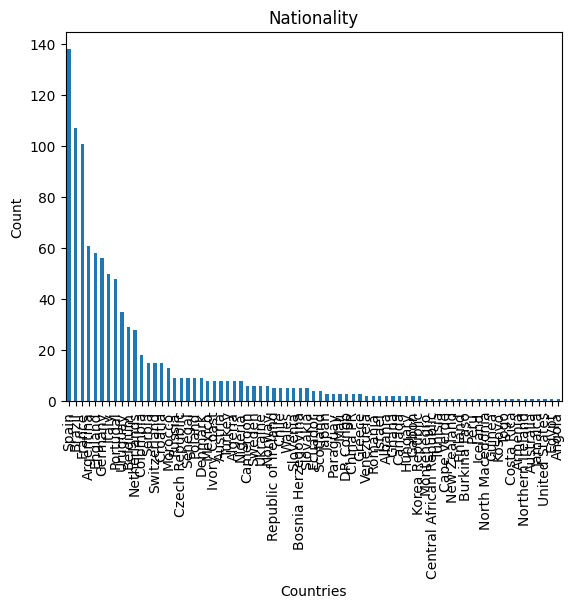

In [ ]:
countries = df['nationality'].value_counts()

# Plot a bar chart of the fruit counts
countries.plot(kind='bar')

# Set the title and axis labels
plt.title('Nationality')
plt.xlabel('Countries')
plt.ylabel('Count')

# Show the plot
plt.show()

Searching for null values

In [ ]:
null_values = df.isnull().sum()

print(null_values)

name                 0
age                  0
height_cm            0
weight_kg            0
nationality          0
club_name           21
overall_rating       0
value_euro           0
player_positions     0
dtype: int64


Dropping the null values

In [ ]:
df = df.dropna()

null_values = df.isnull().sum()

print(null_values)

name                0
age                 0
height_cm           0
weight_kg           0
nationality         0
club_name           0
overall_rating      0
value_euro          0
player_positions    0
dtype: int64


Encoding categorical variables

In [ ]:
#Applying one hot encoding
df_encoded = pd.get_dummies(df, columns=["nationality", "club_name", "player_positions"])

Splitting into training and testing data

In [ ]:
X = df_encoded.drop("value_euro", axis=1)
X = df_encoded.drop("name", axis=1)
y = df_encoded["value_euro"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Scaling Data

In [ ]:
# Define the scaler object
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Applying Decision Tree

In [ ]:
# Define the decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [10, 20, 30],
    'max_features': [None, 'sqrt', 'log2']
}

# Define the grid search object
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print('Best hyperparameters:', grid_search.best_params_)

# Predict on the test set using the best estimator found by the grid search
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate the mean squared error on the test set
dt_mse = mean_squared_error(y_test, y_pred)
print('Decision Tree MSE on test set:', dt_mse)

# Calculate the root mean squared error on the test set
dt_rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Decision Tree RMSE on test set:', dt_rmse)

# Calculate the R-squared value on the test set
dt_r2 = r2_score(y_test, y_pred)
print('R-squared value for Decision Tree:', dt_r2)

Best hyperparameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
Decision Tree MSE on test set: 795027033039.2175
Decision Tree RMSE on test set: 891642.884253117
R-squared value for Decision Tree: 0.9952589342580039


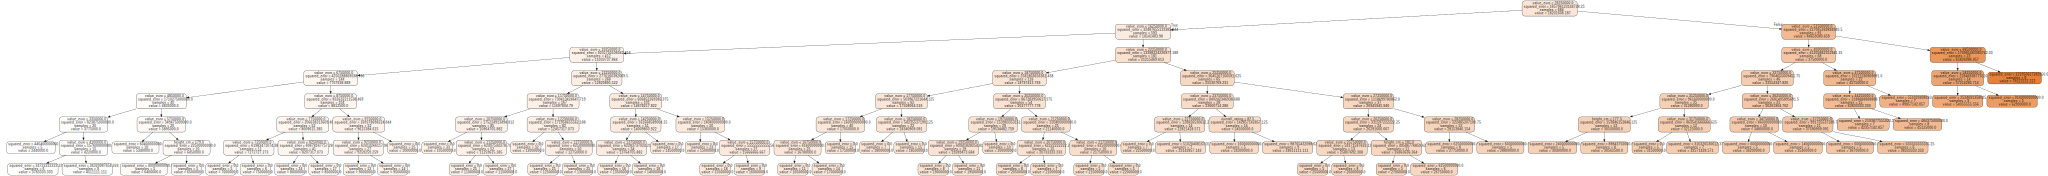

In [ ]:
dot_data = export_graphviz(grid_search.best_estimator_, out_file=None, 
                           feature_names=X_train.columns, filled=True, rounded=True, 
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree.png', format='png')
graph

Applying Gradient Boosting

In [ ]:
# Define the Gradient Boosting regressor with some initial hyperparameters
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the regressor on the training data
gb_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_reg.predict(X_test)

# Calculate the mean squared error on the test set
gd_mse = mean_squared_error(y_test, y_pred)
print('Gradient Boosting MSE on test set:', gd_mse)

# Calculate the root mean squared error on the test set
gd_rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Linear Regression RMSE on test set:', gd_rmse)

# Calculate the R-squared value on the test set
gd_r2 = r2_score(y_test, y_pred)
print('R-squared value for Gradient Boosting:', gd_r2)

Gradient Boosting MSE on test set: 29331114325.221214
Linear Regression RMSE on test set: 171263.28948499504
R-squared value for Gradient Boosting: 0.9998250867762694


Applying Linear Regression

In [ ]:
# Define the linear regression model
lr = LinearRegression()

# Fit the model on the scaled training data
lr.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred = lr.predict(X_test_scaled)

# Calculate the mean squared error on the test set
lr_mse = mean_squared_error(y_test, y_pred)
print('Linear Regression MSE on test set:', lr_mse)


# Calculate the root mean squared error on the test set
lr_rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Linear Regression RMSE on test set:', lr_rmse)

# Calculate the R-squared value on the test set
lr_r2 = r2_score(y_test, y_pred)
print('R-squared value for Linear Regression:', lr_r2)

Linear Regression MSE on test set: 30920785473.520382
Linear Regression RMSE on test set: 175843.07058715844
R-squared value for Linear Regression: 0.999815606928278


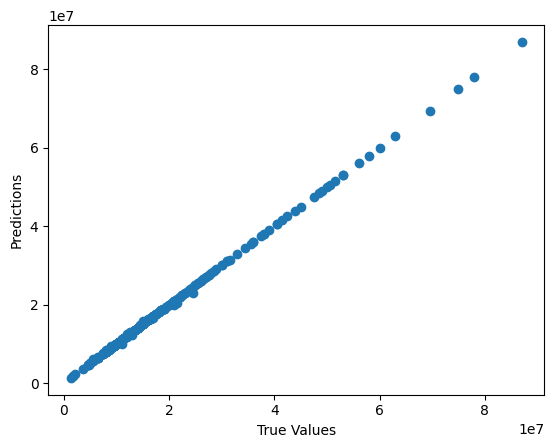

In [ ]:
# Plot the true y values versus the predicted y values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


Applying Support Vector Machine

In [ ]:
# Define the SVM regressor
svm_reg = SVR(kernel='linear')

# Fit the model on the scaled training data
svm_reg.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred = svm_reg.predict(X_test_scaled)

# Calculate the mean squared error on the test set
svm_mse = mean_squared_error(y_test, y_pred)
print('SVM MSE on test set:', svm_mse)

# Calculate the root mean squared error on the test set
svm_rmse = mean_squared_error(y_test, y_pred, squared=False)
print('SVM RMSE on test set:', svm_rmse)

# Calculate the R-squared value on the test set
svm_r2 = r2_score(y_test, y_pred)
print('R-squared value for SVM:', svm_r2)

SVM MSE on test set: 183057367007229.44
SVM RMSE on test set: 13529869.437922506
R-squared value for SVM: -0.09164465542792466


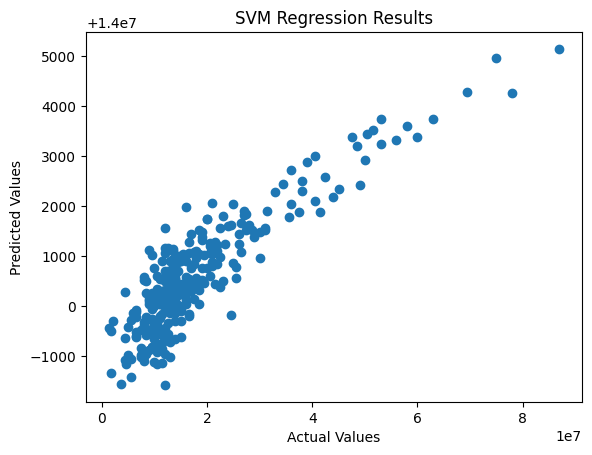

In [ ]:
# Plot the predicted values against the actual values on a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM Regression Results')
plt.show()


R-Squared Value Comparison

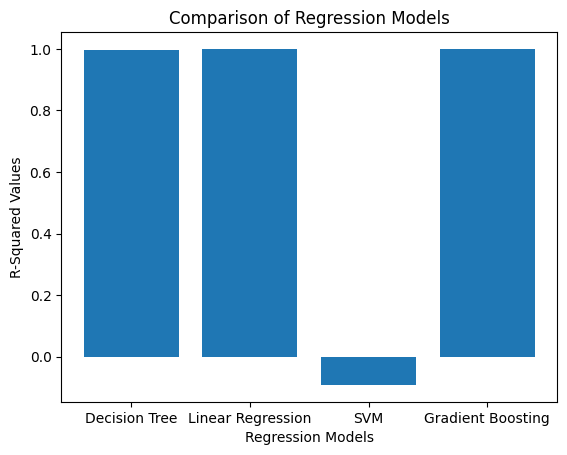

In [ ]:
# Create a list of labels for the x-axis
models = ['Decision Tree', 'Linear Regression', 'SVM', 'Gradient Boosting']

# Create a list of the accuracy values
r_squared_values = [dt_r2, lr_r2, svm_r2, gd_r2]

# Create the bar chart
plt.bar(models, r_squared_values)

# Add labels for the x-axis and y-axis
plt.xlabel('Regression Models')
plt.ylabel('R-Squared Values')

# Add a title for the chart
plt.title('Comparison of Regression Models')

# Display the chart
plt.show()


Mean Squared Error comparison

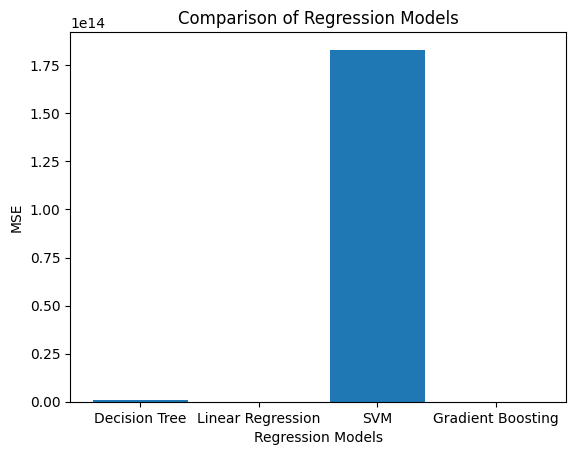

In [ ]:
# Create a list of labels for the x-axis
models = ['Decision Tree', 'Linear Regression', 'SVM', 'Gradient Boosting']

# Create a list of the accuracy values
mean_squared_values = [dt_mse, lr_mse, svm_mse, gd_mse]

# Create the bar chart
plt.bar(models, mean_squared_values)

# Add labels for the x-axis and y-axis
plt.xlabel('Regression Models')
plt.ylabel('MSE')

# Add a title for the chart
plt.title('Comparison of Regression Models')

# Display the chart
plt.show()


Root Mean Squared Error Comparison

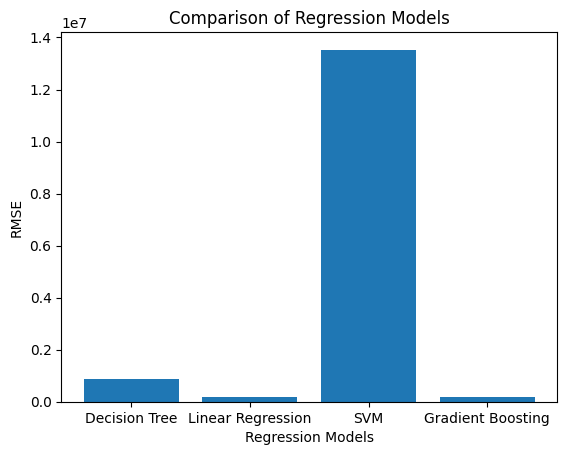

In [ ]:
# Create a list of labels for the x-axis
models = ['Decision Tree', 'Linear Regression', 'SVM', 'Gradient Boosting']

# Create a list of the accuracy values
mean_squared_values = [dt_rmse, lr_rmse, svm_rmse, gd_rmse]

# Create the bar chart
plt.bar(models, mean_squared_values)

# Add labels for the x-axis and y-axis
plt.xlabel('Regression Models')
plt.ylabel('RMSE')

# Add a title for the chart
plt.title('Comparison of Regression Models')

# Display the chart
plt.show()
